In [127]:
# Import the numpy and pandas package
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#Model evaliuation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
# Data Imputiton 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
housing = pd.DataFrame(pd.read_csv("train.csv"))
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
## Data Inspection

In [129]:
housing.shape

(1460, 81)

In [130]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [131]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

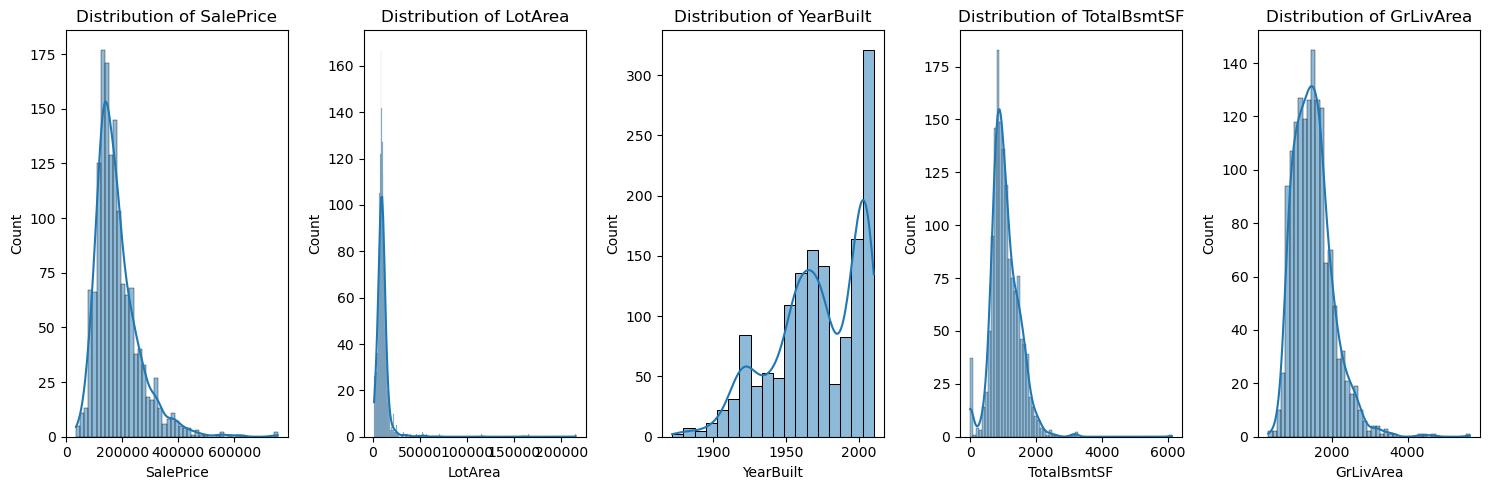

In [132]:
# Select a few columns for plotting
columns_to_plot = ['SalePrice', 'LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

# Plot distributions
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.histplot(housing[column], kde=True)
    plt.title('Distribution of ' + column)
plt.tight_layout()
plt.show()

In [133]:
# Checking Null values
#lending.isnull().sum()*100/lending.shape[0]
100*housing.isnull().mean()

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [134]:
missing_values = housing.isnull().sum()
missing_values = missing_values[missing_values > 0]
dtypes = housing.dtypes

print('Missing values and data types for columns with missing data:')
for col in missing_values.index:
    print(f'{col}: {missing_values[col]} missing, Type: {dtypes[col]}')

# Encoding categorical variables using pd.get_dummies
encoded_housing = pd.get_dummies(housing, drop_first=True)

print('\
Shape of dataframe after encoding:', encoded_housing.shape)

Missing values and data types for columns with missing data:
LotFrontage: 259 missing, Type: float64
Alley: 1369 missing, Type: object
MasVnrType: 872 missing, Type: object
MasVnrArea: 8 missing, Type: float64
BsmtQual: 37 missing, Type: object
BsmtCond: 37 missing, Type: object
BsmtExposure: 38 missing, Type: object
BsmtFinType1: 37 missing, Type: object
BsmtFinType2: 38 missing, Type: object
Electrical: 1 missing, Type: object
FireplaceQu: 690 missing, Type: object
GarageType: 81 missing, Type: object
GarageYrBlt: 81 missing, Type: float64
GarageFinish: 81 missing, Type: object
GarageQual: 81 missing, Type: object
GarageCond: 81 missing, Type: object
PoolQC: 1453 missing, Type: object
Fence: 1179 missing, Type: object
MiscFeature: 1406 missing, Type: object
Shape of dataframe after encoding: (1460, 246)


In [135]:
# Impution and Scaling 

In [136]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
# For numerical columns, will use the median
# For categorical columns, will use the mode 
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separate the dataframe into numerical and categorical
numerical_cols = encoded_housing.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = encoded_housing.select_dtypes(include=['object']).columns

# Imputing  numerical columns
encoded_housing[numerical_cols] = num_imputer.fit_transform(encoded_housing[numerical_cols])

# Check if there are any missing values left
print('Missing values after imputation:', encoded_housing.isnull().sum().sum())

# Standardize numerical features
scaler = StandardScaler()
encoded_housing[numerical_cols] = scaler.fit_transform(encoded_housing[numerical_cols])

# Display the head of the dataframe to confirm changes
# print(encoded_housing.head())

Missing values after imputation: 0


In [137]:
encoded_housing.shape

(1460, 246)

In [138]:
# Define the target variable and features
X = encoded_housing.drop('SalePrice', axis=1)
y = encoded_housing['SalePrice']

Mean Squared Error: 0.23730765364504622


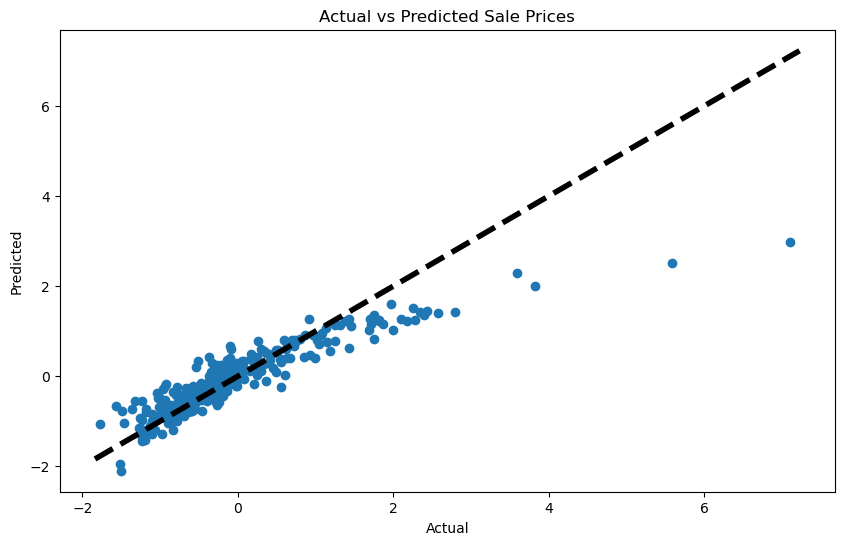

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In [140]:
from sklearn.model_selection import GridSearchCV


# hyperparameter tuning
alpha_range = np.logspace(-4, -0.5, 30)

# Grid search
grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alpha_range), scoring='neg_mean_squared_error', cv=5)

grid.fit(X, y)

# Get the best alpha value and the corresponding MSE
best_alpha = grid.best_params_['alpha']
best_mse = -grid.best_score_
print('Best alpha:', best_alpha)
print('Best MSE from GridSearchCV:', best_mse)

Best alpha: 0.0016102620275609393
Best MSE from GridSearchCV: 0.1603670826763687


Mean Squared Error: 0.15909240810958067


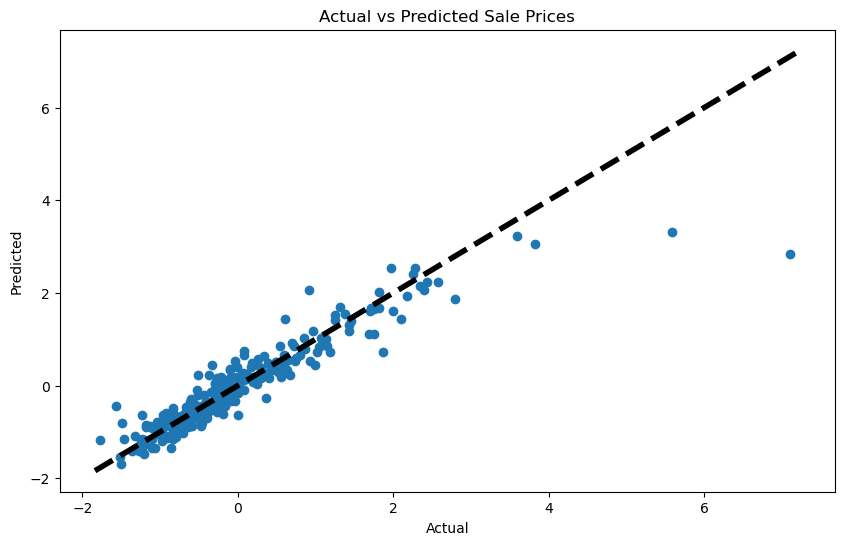

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Lasso model with the optimal alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In [142]:
lasso.coef_

array([-9.73476081e-03, -8.18790292e-02, -4.71282970e-02,  6.02502366e-02,
        1.70513067e-01,  7.94534301e-02,  1.00837367e-01,  2.48736486e-02,
        2.91290912e-02,  1.21293623e-02,  5.27479563e-03, -0.00000000e+00,
        1.15710631e-02,  0.00000000e+00,  0.00000000e+00, -7.12767491e-03,
        2.56488835e-01,  4.85782578e-02,  3.25743404e-03,  4.64821341e-02,
        1.30740464e-02, -1.89463623e-02, -4.64734209e-02,  8.25178675e-02,
        3.79751692e-02, -0.00000000e+00,  1.25996662e-01,  5.90510930e-04,
        3.81266018e-02,  8.56169437e-03,  2.14634332e-02,  5.96738813e-03,
        3.70244747e-02, -3.35888721e-02, -1.83220131e-03, -6.89771437e-03,
       -4.08724942e-03,  0.00000000e+00,  0.00000000e+00,  3.72172021e-03,
       -5.45027882e-02,  0.00000000e+00,  0.00000000e+00,  4.70975943e-02,
       -4.60719651e-02,  6.81503070e-04,  1.59623192e-01, -0.00000000e+00,
        1.84094945e-01, -0.00000000e+00,  6.81433183e-02, -1.61659471e-03,
       -0.00000000e+00, -

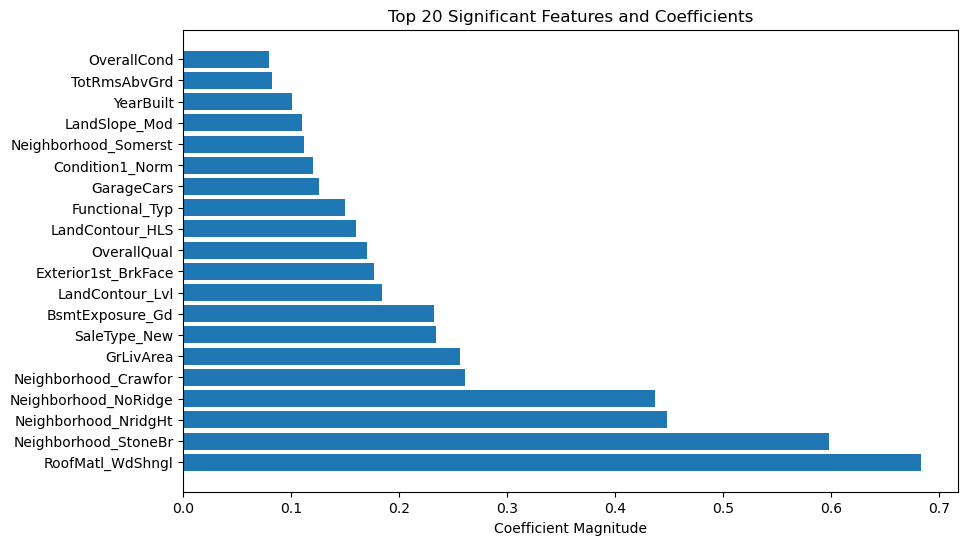

In [143]:

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})


significant_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

top_n = 20
top_significant_features = significant_features.nlargest(top_n, 'Coefficient')


plt.figure(figsize=(10, 6))
plt.barh(top_significant_features['Feature'], top_significant_features['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.title(f'Top {top_n} Significant Features and Coefficients')
plt.show()


In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
alpha_range_ridge = np.logspace(-4, -0.5, 30)

# Grid search for Ridge
grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alpha_range_ridge), scoring='neg_mean_squared_error', cv=5)

grid_ridge.fit(X, y)


best_alpha_ridge = grid_ridge.best_params_['alpha']
best_mse_ridge = -grid_ridge.best_score_
print('Best alpha for Ridge:', best_alpha_ridge)
print('Best MSE from GridSearchCV for Ridge:', best_mse_ridge)

Best alpha for Ridge: 0.31622776601683794
Best MSE from GridSearchCV for Ridge: 0.19007455896490613


Mean Squared Error (Ridge): 0.15174176289009897


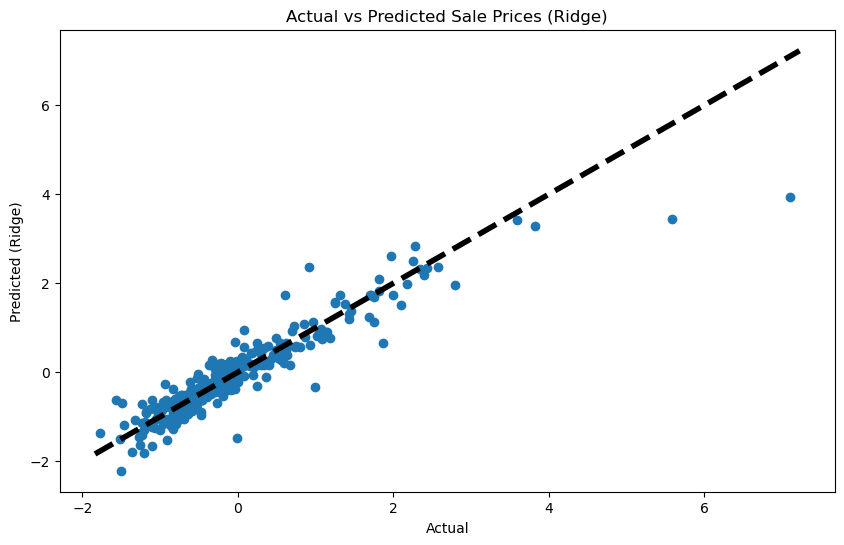

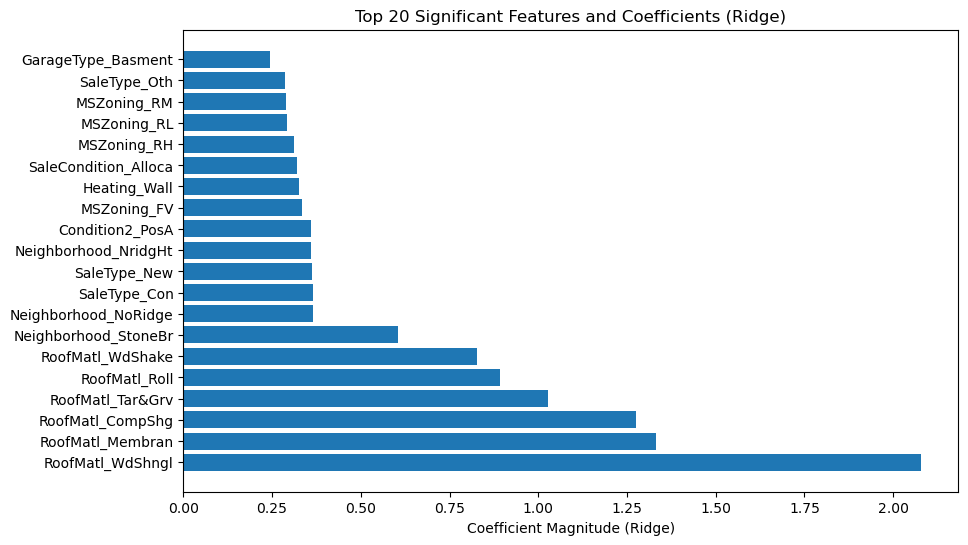

In [146]:
from sklearn.linear_model import Ridge

# Train the Ridge model with the optimal alpha
ridge = Ridge(alpha=best_alpha_ridge) 
ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error (Ridge):', mse_ridge)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted (Ridge)')
plt.title('Actual vs Predicted Sale Prices (Ridge)')
plt.show()


feature_coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})


significant_features_ridge = feature_coefficients_ridge[feature_coefficients_ridge['Coefficient'] != 0]

top_significant_features_ridge = significant_features_ridge.nlargest(top_n, 'Coefficient')

# Plot coefficients for the top N features for Ridge
plt.figure(figsize=(10, 6))
plt.barh(top_significant_features_ridge['Feature'], top_significant_features_ridge['Coefficient'])
plt.xlabel('Coefficient Magnitude (Ridge)')
plt.title(f'Top {top_n} Significant Features and Coefficients (Ridge)')
plt.show()

In [ ]:
#If we double the alpha for ridge 

Mean Squared Error (Ridge): 0.15328811756745025


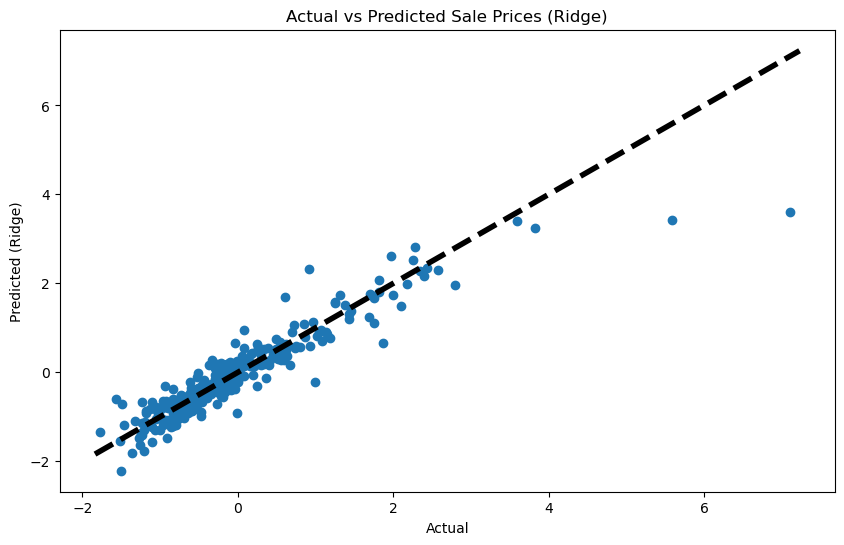

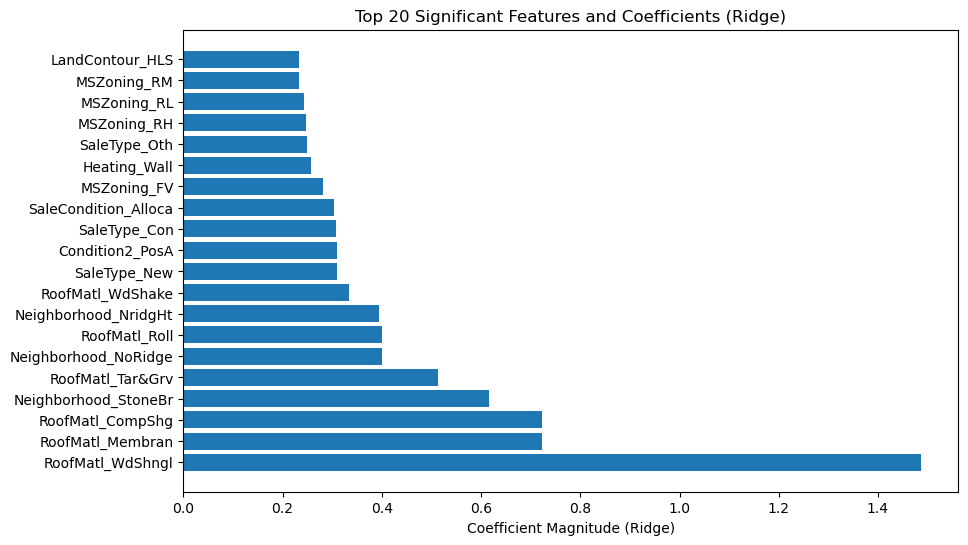

In [147]:
ridge = Ridge(alpha=2*best_alpha_ridge) 
ridge.fit(X_train, y_train)


y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error (Ridge):', mse_ridge)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted (Ridge)')
plt.title('Actual vs Predicted Sale Prices (Ridge)')
plt.show()


feature_coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})


significant_features_ridge = feature_coefficients_ridge[feature_coefficients_ridge['Coefficient'] != 0]

top_significant_features_ridge = significant_features_ridge.nlargest(top_n, 'Coefficient')

# Plot coefficients for the top N features for Ridge
plt.figure(figsize=(10, 6))
plt.barh(top_significant_features_ridge['Feature'], top_significant_features_ridge['Coefficient'])
plt.xlabel('Coefficient Magnitude (Ridge)')
plt.title(f'Top {top_n} Significant Features and Coefficients (Ridge)')
plt.show()

In [148]:
#If we double the alpha for lasso 

Mean Squared Error: 0.16135556405522494


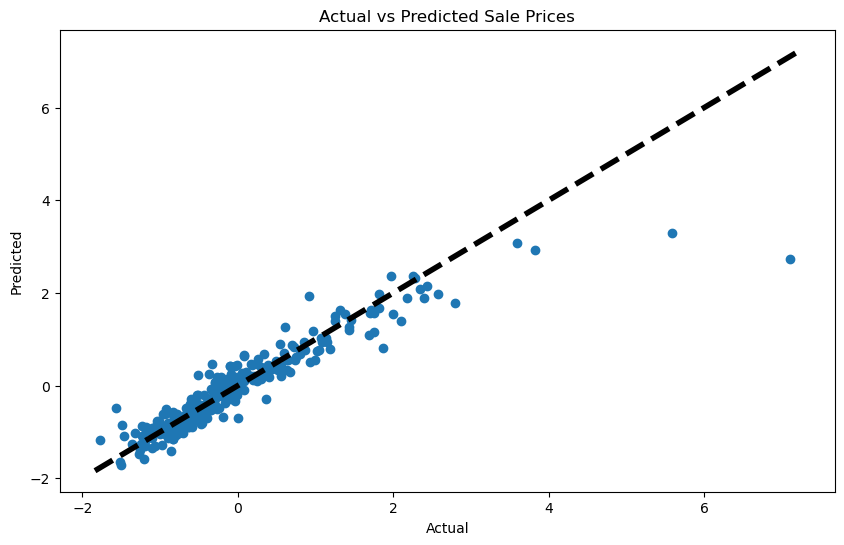

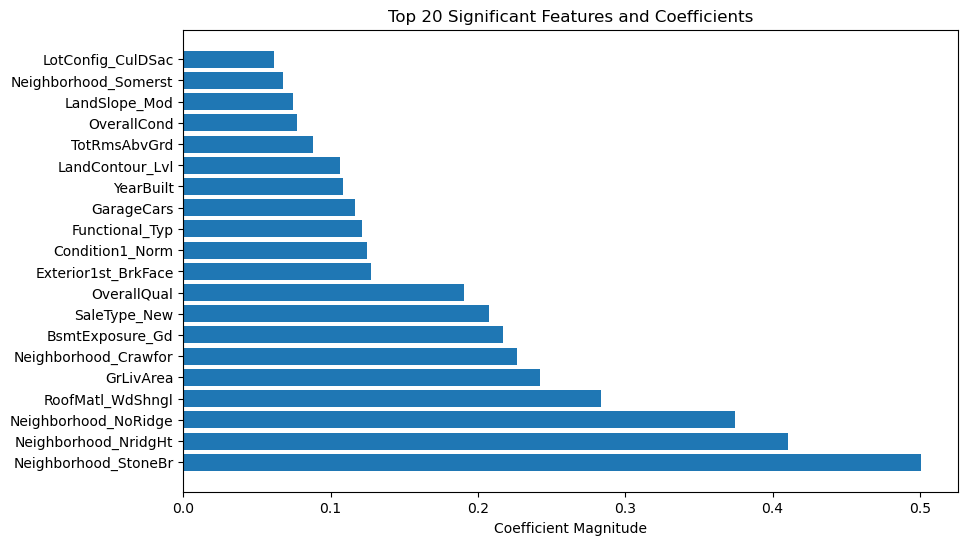

In [149]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Lasso model with the optimal alpha
lasso = Lasso(alpha=2*best_alpha)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})


significant_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

top_n = 20
top_significant_features = significant_features.nlargest(top_n, 'Coefficient')


plt.figure(figsize=(10, 6))
plt.barh(top_significant_features['Feature'], top_significant_features['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.title(f'Top {top_n} Significant Features and Coefficients')
plt.show()

In [155]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) Score for Lasso', r2)
r2_ridge = r2_score(y_test, y_pred_ridge)
print('R-squared (R2) Score for Ridge:', r2_ridge)

R-squared (R2) Score for Lasso 0.857313024537508
R-squared (R2) Score for Ridge: 0.8644470799745557


In [27]:
# Rebuliding Lasso Model after excuding top 5 features 

Mean Squared Error: 0.1633678102275955


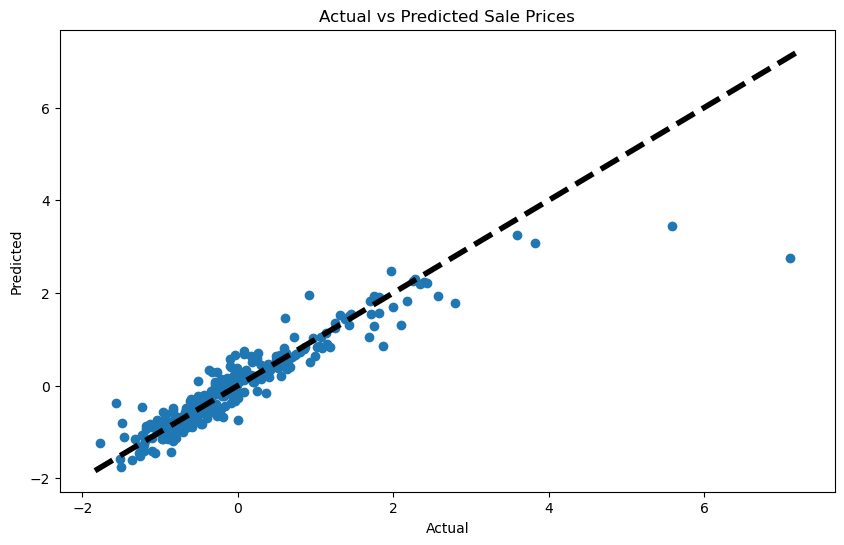

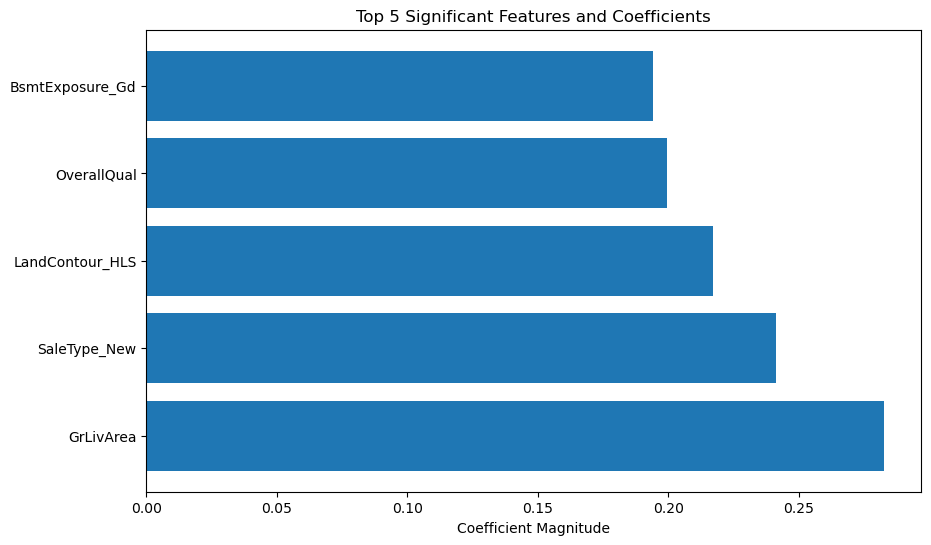

In [28]:
y = encoded_housing['SalePrice']
X = encoded_housing.drop('SalePrice', axis=1)

# List of variables to exclude
exclude_variables = ['RoofMatl_WdShngl', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor']

# Create a new dataset without the excluded variables
X_new = X.drop(columns=exclude_variables)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

# Train the Lasso model with the optimal alpha (you can use the best_alpha obtained previously)
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the actual vs predicted Sale Prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

# Extract feature names and corresponding coefficients
feature_coefficients = pd.DataFrame({'Feature': X_new.columns, 'Coefficient': lasso.coef_})

# Display significant features (non-zero coefficients)
significant_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]
# Select the top N significant features
top_n = 5
top_significant_features = significant_features.nlargest(top_n, 'Coefficient')

# Plot coefficients for the top N features
plt.figure(figsize=(10, 6))
plt.barh(top_significant_features['Feature'], top_significant_features['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.title(f'Top {top_n} Significant Features and Coefficients')
plt.show()